In [30]:
import numpy as np
import pandas as pd

In [31]:
df = pd.read_csv("parkinsons_updrs.data")

In [32]:
df

,subject#,age,sex,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,Jitter:DDP,Shimmer,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
0,1,72,0,5.6431,28.199,34.398,0.00662,0.000034,0.00401,0.00317,0.01204,0.02565,0.230,0.01438,0.01309,0.01662,0.04314,0.014290,21.640,0.41888,0.54842,0.16006
1,1,72,0,12.6660,28.447,34.894,0.00300,0.000017,0.00132,0.00150,0.00395,0.02024,0.179,0.00994,0.01072,0.01689,0.02982,0.011112,27.183,0.43493,0.56477,0.10810
2,1,72,0,19.6810,28.695,35.389,0.00481,0.000025,0.00205,0.00208,0.00616,0.01675,0.181,0.00734,0.00844,0.01458,0.02202,0.020220,23.047,0.46222,0.54405,0.21014
3,1,72,0,25.6470,28.905,35.810,0.00528,0.000027,0.00191,0.00264,0.00573,0.02309,0.327,0.01106,0.01265,0.01963,0.03317,0.027837,24.445,0.48730,0.57794,0.33277
4,1,72,0,33.6420,29.187,36.375,0.00335,0.000020,0.00093,0.00130,0.00278,0.01703,0.176,0.00679,0.00929,0.01819,0.02036,0.011625,26.126,0.47188,0.56122,0.19361
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5870,42,61,0,142.7900,22.485,33.485,0.00406,0.000031,0.00167,0.00168,0.00500,0.01896,0.160,0.00973,0.01133,0.01549,0.02920,0.025137,22.369,0.64215,0.55314,0.21367
5871,42,61,0,149.8400,21.988,32.988,0.00297,0.000025,0.00119,0.00147,0.00358,0.02315,0.215,0.01052,0.01277,0.01904,0.03157,0.011927,22.886,0.52598,0.56518,0.12621
5872,42,61,0,156.8200,21.495,32.495,0.00349,0.000025,0.00152,0.00187,0.00456,0.02499,0.244,0.01371,0.01456,0.01877,0.04112,0.017701,25.065,0.47792,0.57888,0.14157
5873,42,61,0,163.7300,21.007,32.007,0.00281,0.000020,0.00128,0.00151,0.00383,0.01484,0.131,0.00693,0.00870,0.01307,0.02078,0.007984,24.422,0.56865,0.56327,0.14204


In [33]:
df.dtypes


subject#           int64
age                int64
sex                int64
test_time        float64
motor_UPDRS      float64
total_UPDRS      float64
Jitter(%)        float64
Jitter(Abs)      float64
Jitter:RAP       float64
Jitter:PPQ5      float64
Jitter:DDP       float64
Shimmer          float64
Shimmer(dB)      float64
Shimmer:APQ3     float64
Shimmer:APQ5     float64
Shimmer:APQ11    float64
Shimmer:DDA      float64
NHR              float64
HNR              float64
RPDE             float64
DFA              float64
PPE              float64
dtype: object

In [34]:
df.isnull

<bound method DataFrame.isnull of       subject#  age  sex  test_time  ...     HNR     RPDE      DFA      PPE
0            1   72    0     5.6431  ...  21.640  0.41888  0.54842  0.16006
1            1   72    0    12.6660  ...  27.183  0.43493  0.56477  0.10810
2            1   72    0    19.6810  ...  23.047  0.46222  0.54405  0.21014
3            1   72    0    25.6470  ...  24.445  0.48730  0.57794  0.33277
4            1   72    0    33.6420  ...  26.126  0.47188  0.56122  0.19361
...        ...  ...  ...        ...  ...     ...      ...      ...      ...
5870        42   61    0   142.7900  ...  22.369  0.64215  0.55314  0.21367
5871        42   61    0   149.8400  ...  22.886  0.52598  0.56518  0.12621
5872        42   61    0   156.8200  ...  25.065  0.47792  0.57888  0.14157
5873        42   61    0   163.7300  ...  24.422  0.56865  0.56327  0.14204
5874        42   61    0   170.7300  ...  23.259  0.58608  0.57077  0.15336

[5875 rows x 22 columns]>

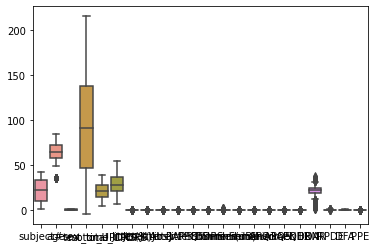

In [35]:
import seaborn as sns 

sns.boxplot(data=df)

Log transformation for column HNR

In [36]:
df["HNR"] = df["HNR"].map(lambda i: np.log(i) if i > 0 else 0) 


Removing outliers for column age

In [37]:
q1 = df['age'].quantile(0.25)
q3 = df['age'].quantile(0.75)
iqr = q3-q1
fence_low  = q1-1.5*iqr
fence_high = q3+1.5*iqr
df = df.loc[(df['age'] > fence_low) & (df['age'] < fence_high)]
    

correlation analysis

In [38]:
df.corr

<bound method DataFrame.corr of       subject#  age  sex  test_time  ...       HNR     RPDE      DFA      PPE
0            1   72    0     5.6431  ...  3.074543  0.41888  0.54842  0.16006
1            1   72    0    12.6660  ...  3.302592  0.43493  0.56477  0.10810
2            1   72    0    19.6810  ...  3.137536  0.46222  0.54405  0.21014
3            1   72    0    25.6470  ...  3.196426  0.48730  0.57794  0.33277
4            1   72    0    33.6420  ...  3.262931  0.47188  0.56122  0.19361
...        ...  ...  ...        ...  ...       ...      ...      ...      ...
5870        42   61    0   142.7900  ...  3.107676  0.64215  0.55314  0.21367
5871        42   61    0   149.8400  ...  3.130525  0.52598  0.56518  0.12621
5872        42   61    0   156.8200  ...  3.221472  0.47792  0.57888  0.14157
5873        42   61    0   163.7300  ...  3.195484  0.56865  0.56327  0.14204
5874        42   61    0   170.7300  ...  3.146692  0.58608  0.57077  0.15336

[5774 rows x 22 columns]>

In [39]:
import matplotlib.pyplot as plt

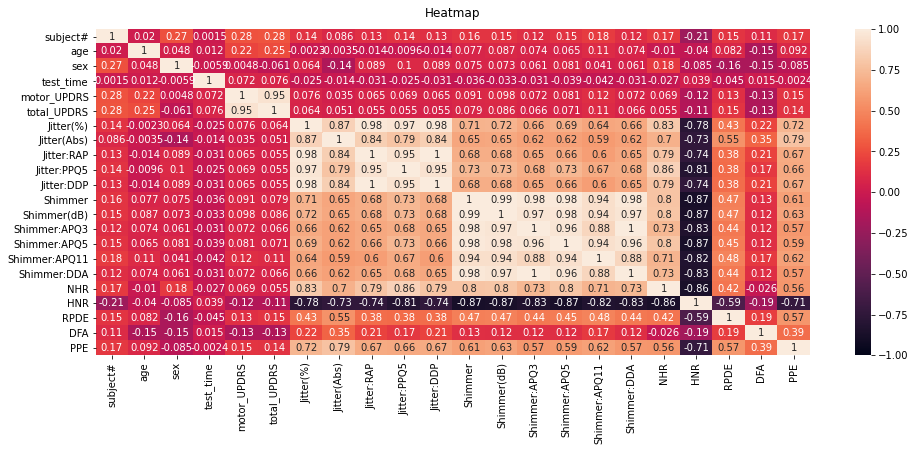

In [40]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Heatmap', fontdict={'fontsize':12}, pad=12);

Boxplot

In [41]:
def correlation(dataset,threshold):
    col_corr = set() # set all the names of correlated columns
    corr_matrix = dataset.corr() # hey just execute  dataset.corr() to understand this line.
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if(corr_matrix.iloc[i,j])> threshold:
                colname= corr_matrix.columns[i]  #getting column names
                col_corr.add(colname)
    return col_corr

In [42]:
corr_features = correlation(df,0.9)
len(set(corr_features))
corr_features

{'Jitter:DDP',
 'Jitter:PPQ5',
 'Jitter:RAP',
 'Shimmer(dB)',
 'Shimmer:APQ11',
 'Shimmer:APQ3',
 'Shimmer:APQ5',
 'Shimmer:DDA',
 'total_UPDRS'}

In [43]:
df = df.drop(["Jitter:DDP","Jitter:PPQ5","Jitter:RAP","Shimmer(dB)","Shimmer:APQ11","Shimmer:APQ3","Shimmer:APQ5","Shimmer:DDA"], axis=1)


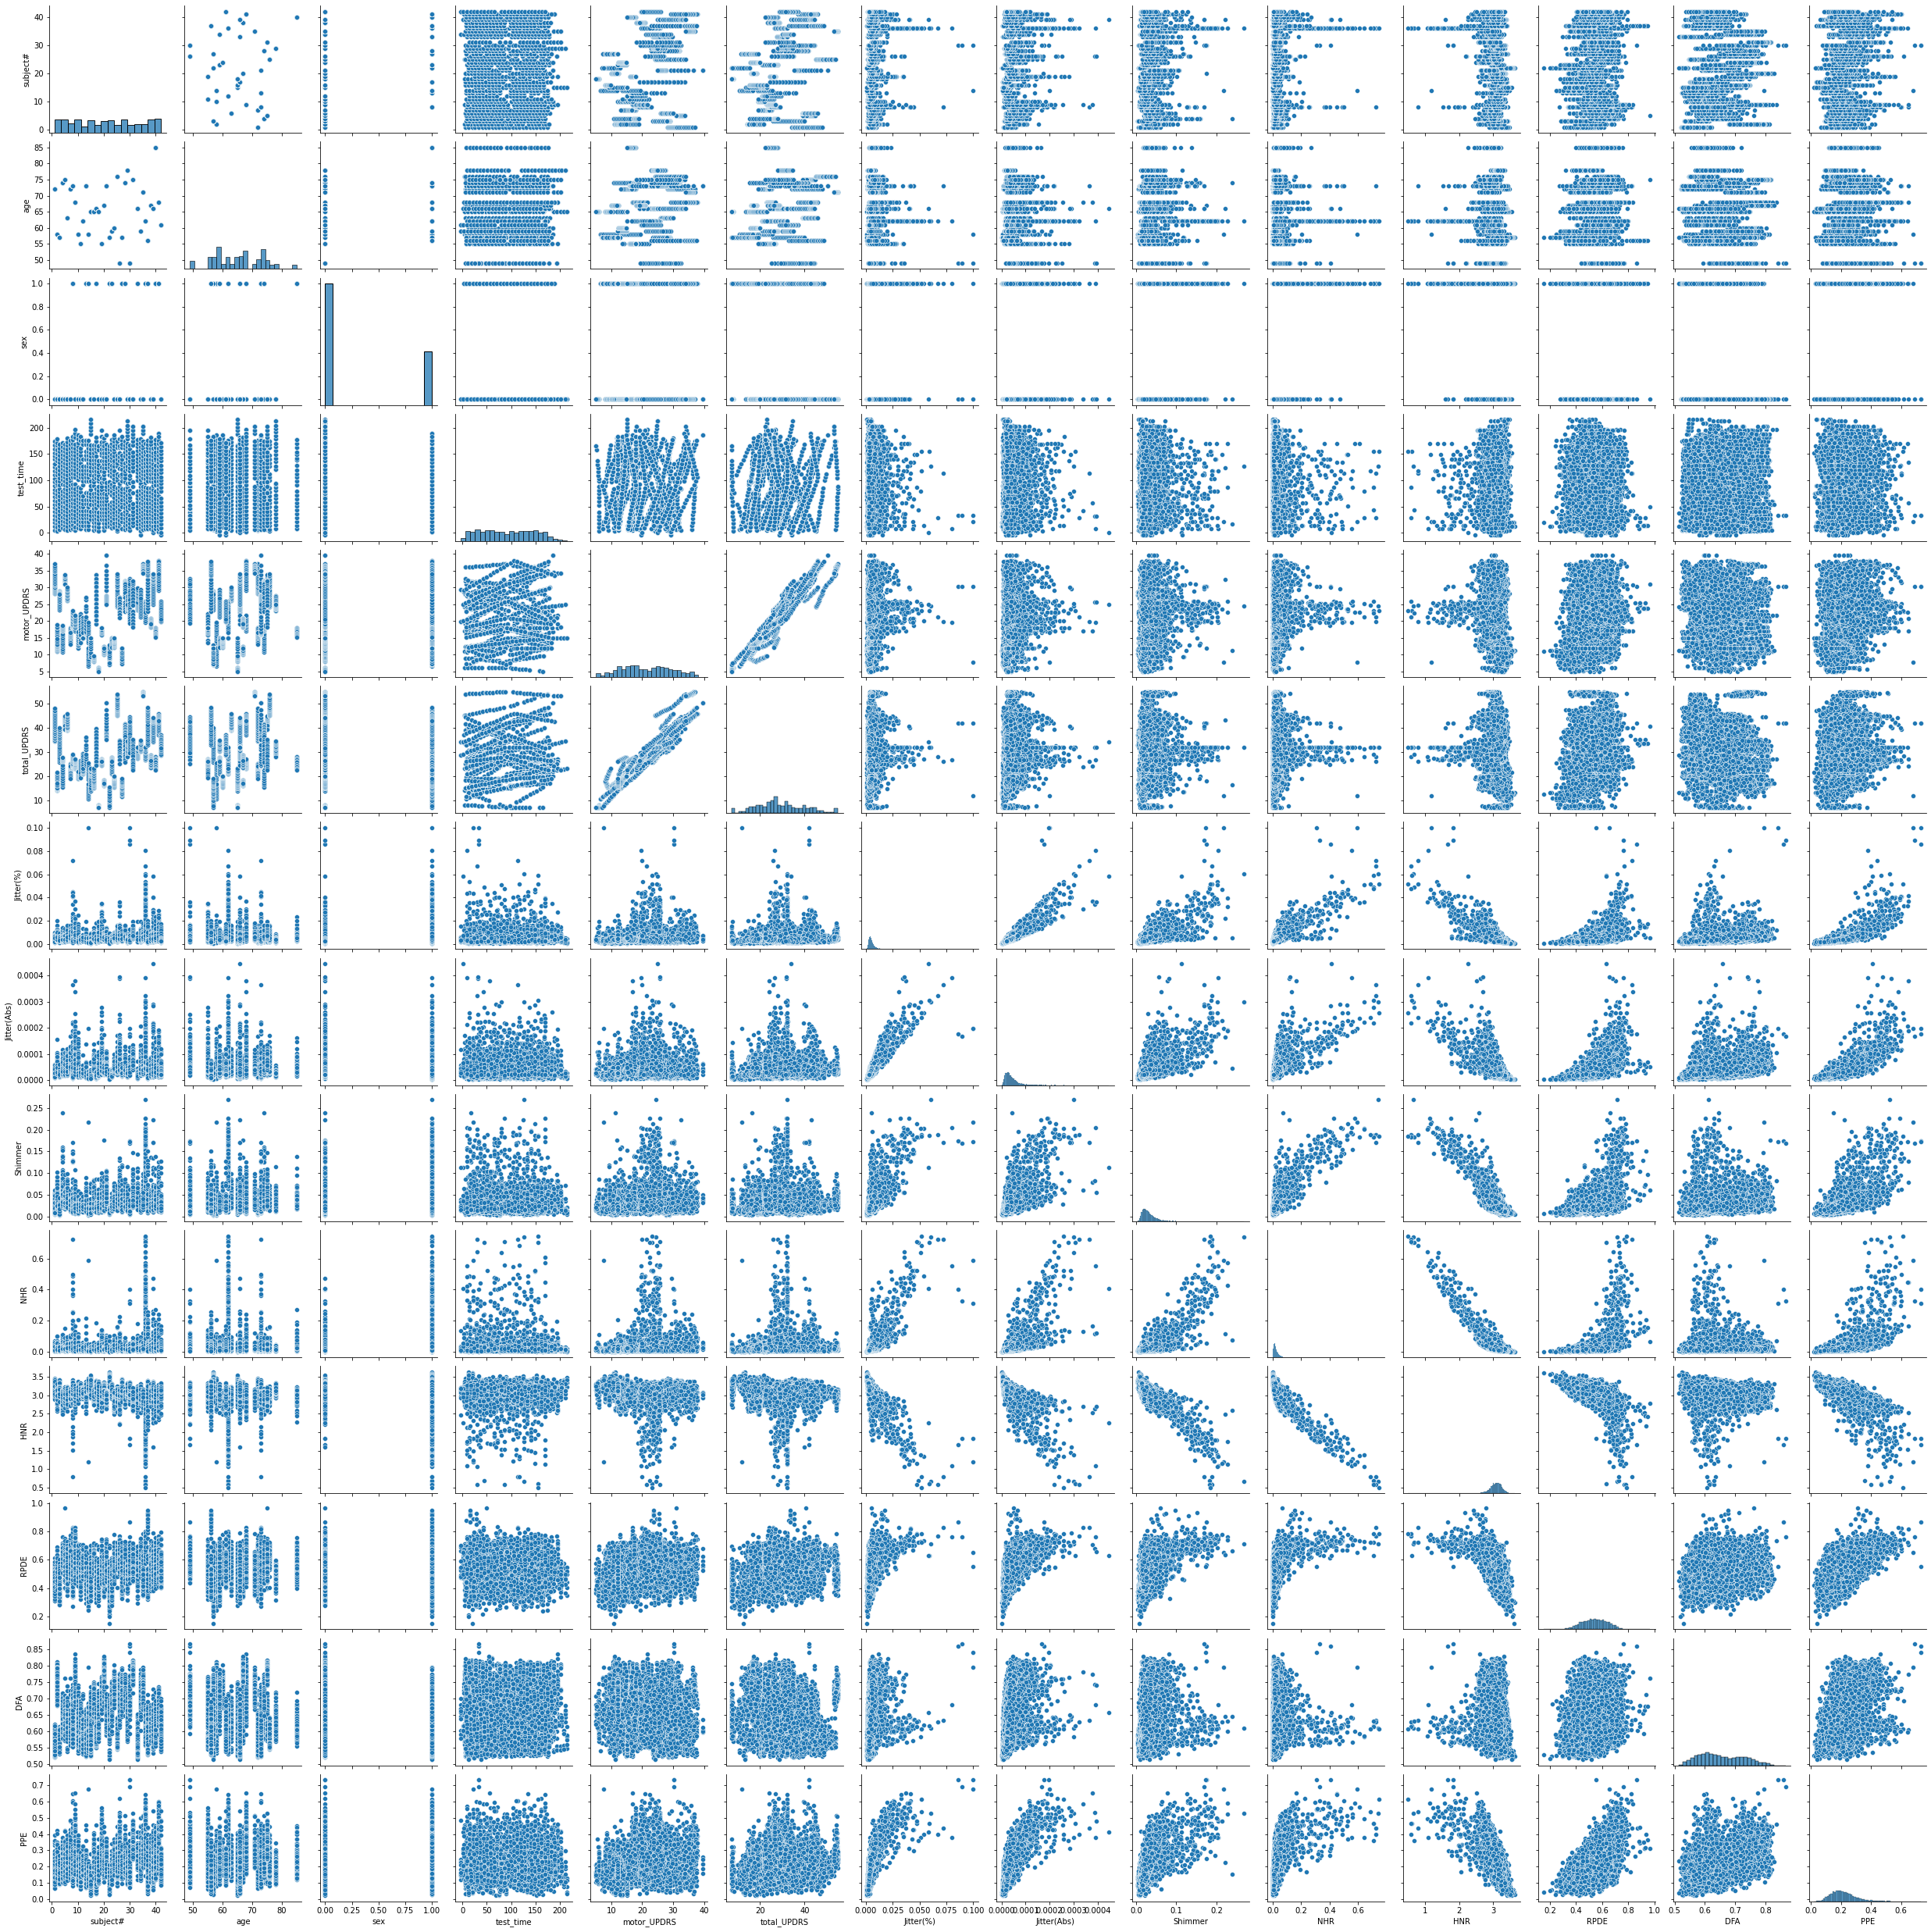

In [45]:
sns.pairplot(df)